In [5]:
!wget https://archive.org/download/kc_house_data/kc_house_data.csv

--2024-03-28 11:07:02--  https://archive.org/download/kc_house_data/kc_house_data.csv
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dn790006.ca.archive.org/0/items/kc_house_data/kc_house_data.csv [following]
--2024-03-28 11:07:03--  https://dn790006.ca.archive.org/0/items/kc_house_data/kc_house_data.csv
Resolving dn790006.ca.archive.org (dn790006.ca.archive.org)... 184.105.203.173
Connecting to dn790006.ca.archive.org (dn790006.ca.archive.org)|184.105.203.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2226636 (2.1M) [text/csv]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.12M  4.20MB/s    in 0.5s    

2024-03-28 11:07:04 (4.20 MB/s) - ‘kc_house_data.csv’ saved [2226636/2226636]



In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [7]:
# read file csv


df = pd.read_csv("/content/kc_house_data.csv")
df.head()
#

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

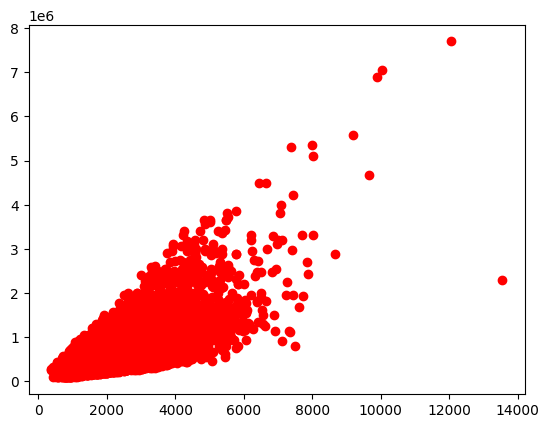

In [9]:


sqft_living=df['sqft_living'].values
price=df['price'].values

plt.plot(sqft_living, price,'ro')


plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

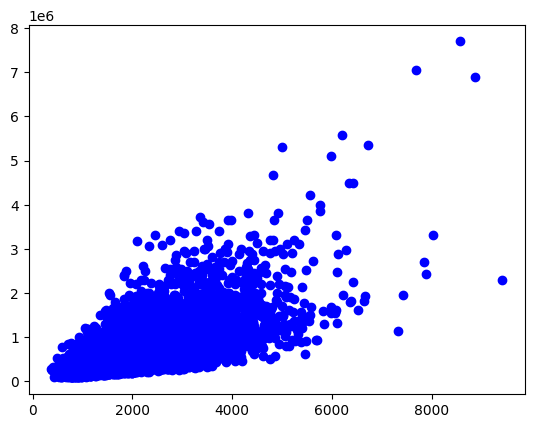

In [10]:
sqft_above=df['sqft_above'].values
plt.plot(sqft_above, price,'bo')
plt.show

In [11]:
data={
    'price':price,
    'sqft_above':sqft_above,
    'sqft_living':sqft_living
}
data=pd.DataFrame(data)
print(data)

          price  sqft_above  sqft_living
0      221900.0        1180         1180
1      538000.0        2170         2570
2      180000.0         770          770
3      604000.0        1050         1960
4      510000.0        1680         1680
...         ...         ...          ...
21592  360000.0        1530         1530
21593  400000.0        2310         2310
21594  402101.0        1020         1020
21595  400000.0        1600         1600
21596  325000.0        1020         1020

[21597 rows x 3 columns]


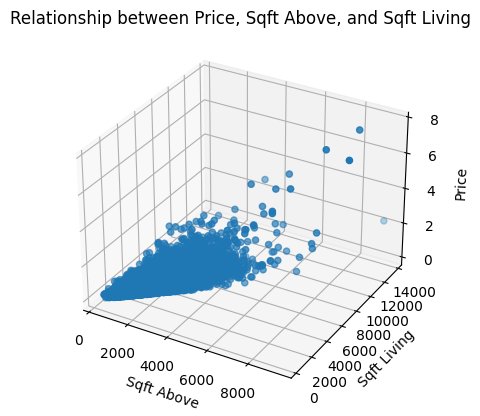

In [36]:
# Tạo một subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# Vẽ biểu đồ
ax.scatter(sqft_above, sqft_living, price)

# Đặt nhãn cho các trục
ax.set_xlabel('Sqft Above')
ax.set_ylabel('Sqft Living')
ax.set_zlabel('Price')

# Đặt tiêu đề cho biểu đồ
plt.title('Relationship between Price, Sqft Above, and Sqft Living')

# Hiển thị biểu đồ
plt.show()

# **Thực hiện tính toán w và b**

In [13]:
idx = np.random.rand(len(df)) < 0.8
train = data[idx]
test = data[~idx]

print('Train size:', len(train))
print('Train test:', len(test))

Train size: 17285
Train test: 4312


In [14]:
print(train)

          price  sqft_above  sqft_living
0      221900.0        1180         1180
2      180000.0         770          770
4      510000.0        1680         1680
6      257500.0        1715         1715
7      291850.0        1060         1060
...         ...         ...          ...
21592  360000.0        1530         1530
21593  400000.0        2310         2310
21594  402101.0        1020         1020
21595  400000.0        1600         1600
21596  325000.0        1020         1020

[17285 rows x 3 columns]


price=w_1 X sqft_above + w_2 X sqft_living+w_0

In [42]:
sqft=np.array([train['sqft_above'].values, train['sqft_living'].values]).T
one=np.ones((sqft.shape[0],1))
sqft_bar=np.concatenate((one,sqft),axis=1)
print(sqft_bar)

A=np.dot(sqft_bar.T,sqft_bar)
b=np.dot(sqft_bar.T,np.array([train['price'].values]).T)
print(b)
w=np.dot(np.linalg.pinv(A),b)

print(w)


[[1.00e+00 1.18e+03 1.18e+03]
 [1.00e+00 7.70e+02 7.70e+02]
 [1.00e+00 1.68e+03 1.68e+03]
 ...
 [1.00e+00 1.02e+03 1.02e+03]
 [1.00e+00 1.60e+03 1.60e+03]
 [1.00e+00 1.02e+03 1.02e+03]]
[[9.30745268e+09]
 [1.97688560e+13]
 [2.33969610e+13]]
[[-3.63222480e+04]
 [-2.19372221e+01]
 [ 2.95194248e+02]]


In [46]:

w_0=w[0][0]
w_1=w[1][0]
w_2=w[2][0]
price_real=test['price'].values
# price=w_1 X sqft_above + w_2 X sqft_living+w_0
def predict(test):
  price_pre=[]
  for sqft_above,sqft_living in zip(test['sqft_above'],test['sqft_living']):
    pre=w_1* sqft_above + w_2 * sqft_living + w_0
    price_pre.append(pre)
  return price_pre
price_pre=predict(test)


In [47]:
def compute_cost(y, y_):
  return(np.mean(abs(np.array(y)-np.array(y_))))
cost=compute_cost(price_real,price_pre)
print(cost)

176209.67130395968
